# MÓDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados


Essa é a primeira etapa do processo de Credit Score que vocês desenvolverão durante nosso curso.
Nessa primeira etapa vocês irão aplicar os passos aprendidos nos módulos de pré processamento para preparar a base de vocês para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Em outras palavras, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

**Atenção:** Notem que esse projeto é diferente da base que tenho trabalhado com vocês em aula, apesar de se tratar de uma base bancária durante a aula falamos sobre a variável Churn a ser prevista, nesse caso a previsão seria do valor do Score de Crédito.

In [2]:
# BIBLIOTECAS UTILIZADAS
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import numpy as np
from plotly.subplots import make_subplots
from plotly.subplots import make_subplots
import plotly.express as px
from pyparsing import alphas
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


In [3]:
# IMPORT
df = pd.read_csv("CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')
df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


# Etapa 1: Relize os passos que vimos no módulo 18, de pré processamento dos dados.

## A) Verifique os tipos de dados, fazendo as transformações quando necessário.

Primeiro, vamos identificar os tipos de dados

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 130 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    object 
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 10.4+ KB


### Análise e tratamento

- A coluna `Age` é uma variável do tipo `float64`, quando o mais aceitável seria o tipo `int`.
- A coluna `Income` é uma variável do tipo `object`, especificamente, está em formato e `string`, quando o correto é `float64`.

Realizaremos a mudança do tipo de variável com base seguindo esta análise

In [5]:
# MUDANÇA DO TIPO DE VARIÁVEL DA COLUNA AGE: FLOAT -> INT
df['Age'] = df['Age'].astype('Int64')

# MUDANÇA DO TIPO DE VARIÁVEL DA COLUNA INCOME: OBJECT -> FLOAT
df['Income'] = df['Income'].str.replace('.', '', regex=False)
df['Income'] = df['Income'].str.replace(',', '.', regex=False)
df['Income'] = df['Income'].astype('Float64')

In [6]:
# RESULTADO PÓS-TRATAMENTO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 130 non-null    Int64  
 1   Gender              164 non-null    object 
 2   Income              164 non-null    Float64
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: Float64(1), Int64(1), int64(1), object(5)
memory usage: 10.7+ KB


## B) Verifique se temos colunas com dados faltantes. Caso existam colunas com dados faltantes faça o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.

In [7]:
# VERIFICAÇÃO DE PORCENTAGEM DE VALORES NULOS EM CADA COLUNA
((df.isnull().sum() / df.shape[0])*100).round(2)

Age                   20.73
Gender                 0.00
Income                 0.00
Education              0.00
Marital Status         0.00
Number of Children     0.00
Home Ownership         0.00
Credit Score           0.00
dtype: float64

### Análise e tratamento

Observamos que apenas o campo `Age` possui valores nulos e representam $20%$ dos valores da coluna. Dada a quantidade expressiva, substituiremos os valores nulos pela média do valor de idades para não perder uma quantidade de informação considerável.

In [8]:
# SUBSTITUIÇÃO DE VALORES NULOS PELA MÉDIA
df['Age'] = df['Age'].fillna(int(df['Age'].mean()))

In [9]:
# VERIFICAÇÃO DO TRATAMENTO DE VALORES NULOS
df.isnull().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

## C) Verifique se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.

Por questão de gosto e para evitar erros do tipo _case-sensitive_, passamos todas as variáveis para CAIXA-ALTA

In [10]:
# NOME DAS COLUNAS
df.columns = df.columns.str.upper()

# CONTEÚDO DAS COLUNAS DO TIPO OBJECT (STRING)
df['GENDER'] = df['GENDER'].str.upper()
df['EDUCATION'] = df['EDUCATION'].str.upper()
df['MARITAL STATUS'] = df['MARITAL STATUS'].str.upper()
df['HOME OWNERSHIP'] = df['HOME OWNERSHIP'].str.upper()
df['CREDIT SCORE'] = df['CREDIT SCORE'].str.upper()

In [11]:
# RESULTADO PARCIAL
df.head()

,AGE,GENDER,INCOME,EDUCATION,MARITAL STATUS,NUMBER OF CHILDREN,HOME OWNERSHIP,CREDIT SCORE
0,25,FEMALE,50000.0,BACHELOR'S DEGREE,SINGLE,0,RENTED,HIGH
1,30,MALE,100000.0,MASTER'S DEGREE,MARRIED,2,OWNED,HIGH
2,35,FEMALE,75000.0,DOCTORATE,MARRIED,1,OWNED,HIGH
3,40,MALE,125000.0,HIGH SCHOOL DIPLOMA,SINGLE,0,OWNED,HIGH
4,45,FEMALE,100000.0,BACHELOR'S DEGREE,MARRIED,3,OWNED,HIGH


Agora, vamos verificar se temos erros de digitação

In [12]:
# VERIFICAÇÃO DE VALORES ÚNICOS DAS VARIÁVEIS DO TIPO OBJECT (STRING)
print("VALORES ÚNICOS GENDER: ", df['GENDER'].unique().tolist())
print("VALORES ÚNICOS EDUCATION: ", df['EDUCATION'].unique().tolist())
print("VALORES ÚNICOS MARITAL STATUS: ", df['MARITAL STATUS'].unique().tolist())
print("VALORES ÚNICOS HOME OWNERSHIP: ", df['HOME OWNERSHIP'].unique().tolist())
print("VALORES ÚNICOS HOME CREDIT SCORE: ", df['CREDIT SCORE'].unique().tolist())

VALORES ÚNICOS GENDER:  ['FEMALE', 'MALE']
VALORES ÚNICOS EDUCATION:  ["BACHELOR'S DEGREE", "MASTER'S DEGREE", 'DOCTORATE', 'HIGH SCHOOL DIPLOMA', "ASSOCIATE'S DEGREE"]
VALORES ÚNICOS MARITAL STATUS:  ['SINGLE', 'MARRIED']
VALORES ÚNICOS HOME OWNERSHIP:  ['RENTED', 'OWNED']
VALORES ÚNICOS HOME CREDIT SCORE:  ['HIGH', 'AVERAGE', 'LOW']


Não temos.

# Etapa 2: Relize os passos que vimos no módulo 15, de análise.

## A) Realiza a análise univariada, aplique a função describe ao nosso dataframe para verificar os dados das variáveis numéricas, se encontrar a possível presença de outliers análise com gráficos a distribuição dos dados. Traga insights sobre os dados analisados.

Primeiro, para manter a organização do código, vamos criar um dataframe separado formado exclusivamente pelas variáveis de valores numéricos.

In [13]:
# CRIAÇÃO DE DATAFRAME APENAS COM VALORES NUMÉRICOS
df_numerico = df[['AGE', 'INCOME', 'NUMBER OF CHILDREN']]

# ANÁLISE ESTATÍSTICA
df_numerico.describe().round(2)

,AGE,INCOME,NUMBER OF CHILDREN
count,164.0,164.0,164.00
mean,37.4,83765.24,0.65
std,7.56,32457.31,0.88
min,25.0,25000.0,0.00
25%,31.75,57500.0,0.00
50%,37.0,83750.0,0.00
75%,43.0,105000.0,1.00
max,53.0,162500.0,3.00


Em seguida, vamos analisar a diferença entre a média e a mediana para identificar a presença (ou não) de _outliers_.

In [14]:
# DIFERENÇA DE MEDIA E MEDIANA
diff_media_mediana = abs(df_numerico.mean() - df_numerico.median()).round(2)
diff_media_mediana

AGE                     0.4
INCOME                15.24
NUMBER OF CHILDREN     0.65
dtype: Float64

Todos os valores de média estão relativamente próximos do valor da mediana, portanto, nota-se a pouca presença de _outliers_ no DataFrame. Realizaremos a plotagem de boxplot das três variáveis para verificação.

In [15]:
# PLOTAGEM DE GRÁFICOS PARA IDENTIFICAÇÃO DE OUTLIERS
fig = make_subplots(rows=1, cols=3, subplot_titles=['INCOME', 'NUMBER OF CHILDREN', 'AGE'])

fig.add_trace(px.box(df_numerico, y='INCOME').data[0], row=1, col=1)
fig.add_trace(px.box(df_numerico, y='NUMBER OF CHILDREN').data[0], row=1, col=2)
fig.add_trace(px.box(df_numerico, y='AGE').data[0], row=1, col=3)
fig.update_layout(width=1200, height=500)

fig.show()


Confirma-se a pouca presença de outliers. O único presente está associado apenas com a variável `NUMBER OF CHILDREN` e, mesmo assim, em uma quantidade desprezível (um).

## B) Agora realize a análise univariada para as variaveis categóricas, plote gráficos para entender a distribuição das categorias e tente retirar insights de cada gráfico.

Primeiro, vamos criar um DataFrame apenas com variáveis categóricas

In [16]:
# CRIAÇÃO DE DATAFRAME APENAS COM VALORES CATEGÓRICOS
df_categorico = df[['GENDER', 'EDUCATION', 'MARITAL STATUS']]

In [17]:
# GRÁFICO PARA DISTRIBUIÇÃO DE GÊNERO
genero_counts = df_categorico['GENDER'].value_counts().reset_index()
genero_counts.columns = ['GENDER', 'COUNT']
fig = px.pie(genero_counts, names='GENDER', values='COUNT', title='Distribuição de gênero')
fig.update_layout(width=1200, height=500)
fig.show()

In [18]:
# GRÁFICO PARA DISTRIBUIÇÃO DE NÍVEL DE ESCOLARIDADE
educacao_counts = df_categorico['EDUCATION'].value_counts().reset_index()
educacao_counts.columns = ['EDUCATION', 'COUNT']
fig = px.pie(educacao_counts, names='EDUCATION', values='COUNT', title='Distribuição Grau de escolaridade')
fig.update_layout(width=1200, height=500)
fig.show()

In [19]:
# GRÁFICO PARA DISTRIBUIÇÃO DE ESTADO CIVIL
marital_status_counts = df_categorico['MARITAL STATUS'].value_counts().reset_index()
marital_status_counts.columns = ['MARITAL STATUS', 'COUNT']
fig = px.pie(marital_status_counts, names='MARITAL STATUS', values='COUNT', title='Distribuição de estado civil')
fig.update_layout(width=1200, height=500)
fig.show()

Dado que queremos realizar uma análise univariada ds distribuições categóricas, julgo que seja relevante analisar como cada categoria está distribuida. Isto posto, dado os resultados, podemos chegar ao seguinte _insight_ geral: todas as variáveis categóricas estão bem distribuidas, ou seja, não há um _label_ que se destaca em alguma coluna.

## C) Você encontrou alguma coluna com outliers? Se sim realize o tratamento desses casos.

Através dos gráficos de BOXPLOT, temos que a única variável que possui um _outlier_ é a variável que se refere ao número de crianças. Isto posto, realizaremos um tratamento para retirar este _outlier_ como forma de tratamento. Vale destacar que: por ser apenas um, podemos concluir que não é algo com potencial de impactar profundamente a análise de dados.

In [20]:
# IDENTIFICAÇÃO DE OUTLIERS POR IQR
q1_nc = df['NUMBER OF CHILDREN'].quantile(0.25)
q3_nc = df['NUMBER OF CHILDREN'].quantile(0.75)
iqr_nc = q3_nc - q1_nc
limite_superior_nc = q3_nc + 1.5 * iqr_nc
limite_inferior_nc = q1_nc - 1.5 * iqr_nc

# ELIMINAÇÃO DO OUTLIER NO DATAFRAME PRINCIPAL
df = df[(df['NUMBER OF CHILDREN'] >= limite_inferior_nc) & (df['NUMBER OF CHILDREN'] <= limite_superior_nc)]

# ATUALIZAÇÃO DO DATAFRAME AUXILIAR
df_numerico = df[['AGE', 'INCOME', 'NUMBER OF CHILDREN']]


In [21]:
# BOXPLOT ATUALIZADO
fig = px.box(df_numerico, y='NUMBER OF CHILDREN')
fig.update_layout(width=1200, height=500)
fig.show()

## D) Realize a análise Bivariada. Tente responder as seguintes perguntas com gráficos seguidos de insights:

### Existe relação entre a idade e o status civil?

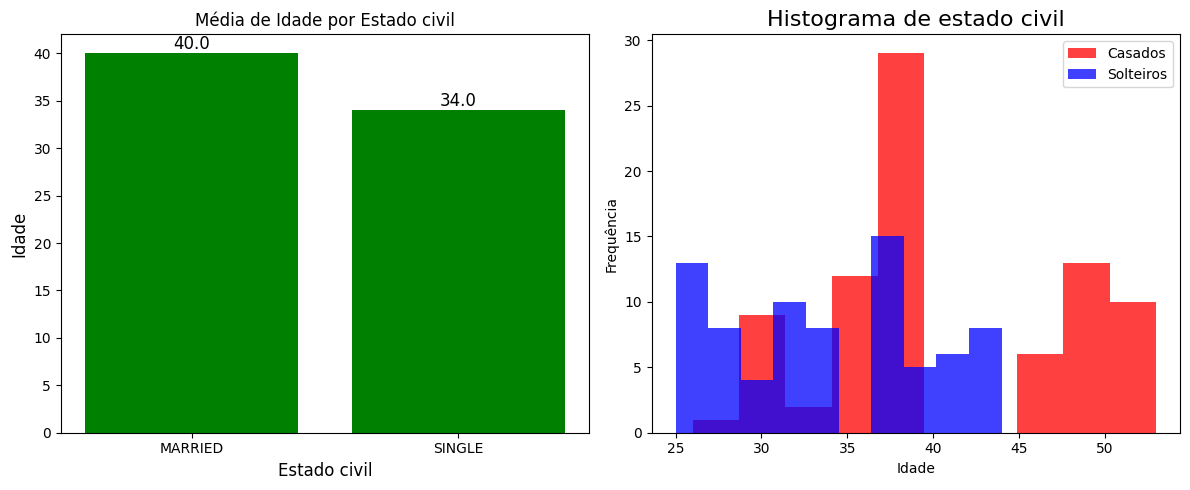

In [22]:
# PLOTAGEM DE GRÁFICOS IDADE X ESTADO CIVIL
plt.figure(figsize=(12, 5))

# GRÁFICO 1: MÉDIA IDADE POR ESTADO CIVIL
plt.subplot(1,2,1)
idade_por_estado_civil = df.groupby('MARITAL STATUS')['AGE'].mean().round()
plt.bar(range(len(idade_por_estado_civil)), idade_por_estado_civil, color='green')

for i, valor in enumerate(idade_por_estado_civil):
    plt.text(i, valor, str(valor), ha='center', va='bottom', fontsize=12)
plt.title('Média de Idade por Estado civil')

plt.xlabel('Estado civil', fontsize=12)
plt.ylabel('Idade', fontsize=12)
plt.xticks(range(len(idade_por_estado_civil)), idade_por_estado_civil.index)

# GRÁFICO 2: HISTOGRAMA DE IDADE POR ESTADO CIVIL
plt.subplot(1,2,2)
plt.hist(df[df['MARITAL STATUS'] == 'MARRIED']['AGE'], bins=10, color='red', alpha = 0.75, label='Casados')
plt.hist(df[df['MARITAL STATUS'] == 'SINGLE']['AGE'], bins=10, color='blue', alpha = 0.75, label='Solteiros')

plt.title("Histograma de estado civil", fontsize=16)
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.legend()

plt.tight_layout()


Analisando o histograma e o gráfico da média, podemos concluir que pessoas mais velhas tem uma tendência maior a serem casadas em comparação às pessoas mais novas. Apesar disso, fica a ressalva de que a diferença entre a média de idade não é tão alta (diferença de seis anos).

### O salário parece influenciar na idade?

_Sugestão:_ Acredito que o correto seria perguntar qual éo nível de influência da idade no salário. O salário é uma variável que não é capaz de influenciar na idade de uma pessoa.

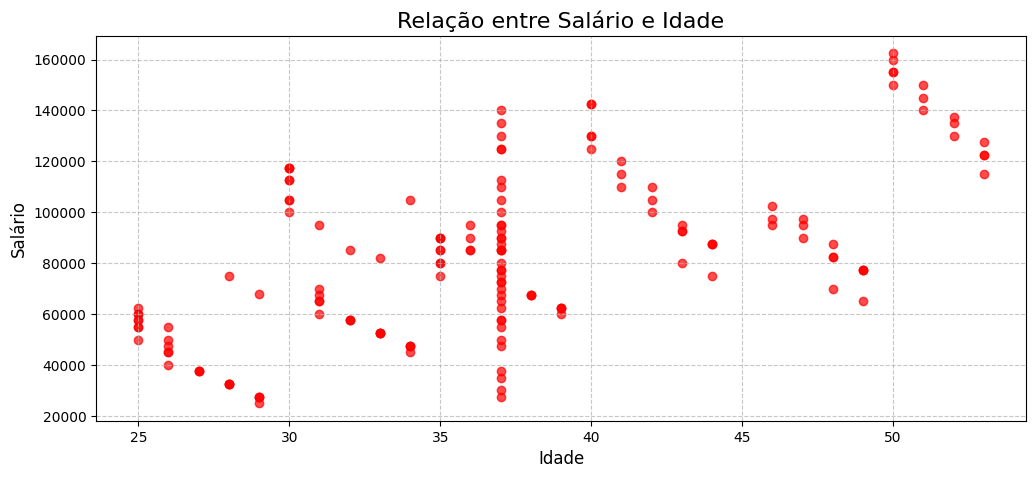

In [23]:
# GRÁFICO DE DISTRIBUIÇÃO SALÁRIO X IDADE
plt.figure(figsize=(12, 5))
plt.scatter(df['AGE'], df['INCOME'], color='red', alpha=0.7)

plt.title('Relação entre Salário e Idade', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Salário', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

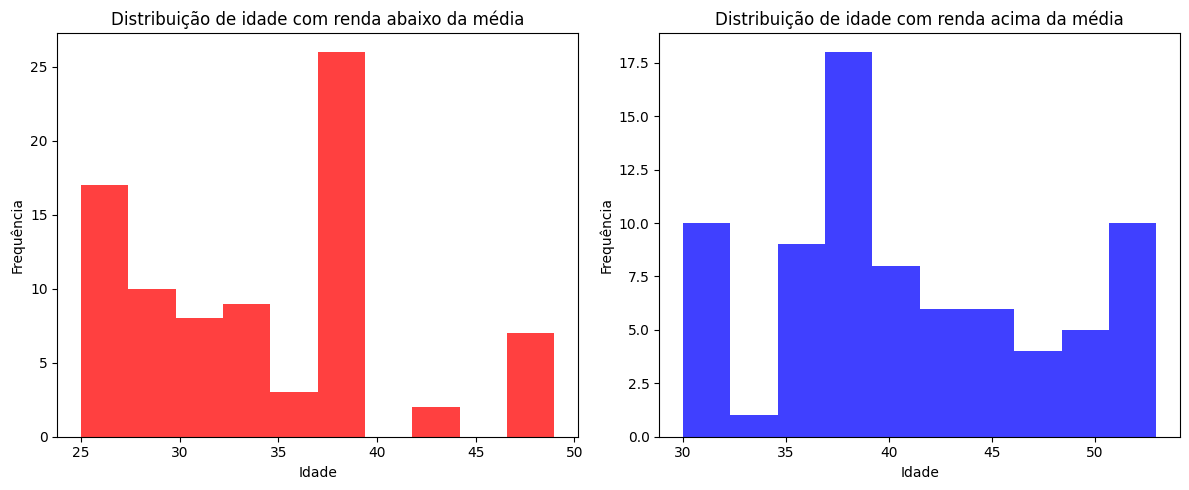

In [24]:
# DISTRIBUIÇÃO DE IDADE ABAIXO DA RENDA MÉDIA
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.hist(
    df[df['INCOME'] < df['INCOME'].mean()]['AGE'], bins=10, color='red', alpha=0.75)
plt.title("Distribuição de idade com renda abaixo da média")
plt.xlabel("Idade")
plt.ylabel("Frequência")

# DISTRIBUIÇÃO DE IDADE ACIMA DA RENDA MÉDIA
plt.subplot(1,2,2)
plt.hist(df[df['INCOME'] > df['INCOME'].mean()]['AGE'], bins=10, color='blue', alpha=0.75)
plt.title("Distribuição de idade com renda acima da média")
plt.xlabel("Idade")
plt.ylabel("Frequência")

plt.tight_layout()


Pelo gráfico de dispersão, a relação não é tão clara, mas podemos visualizar que quanto maior a idade, o menor e o maior salário tendem a aumentar. Podemos ver isso claramente na frequência de distribuição de renda abaixo da média e renda acima da média. Perceba pelos dois histogramas que a faixa de 25-30 anos recebe abaixo da média salarial do DataFrame.

### Qual a relação entre o score de crédito e o nível de escolaridade?

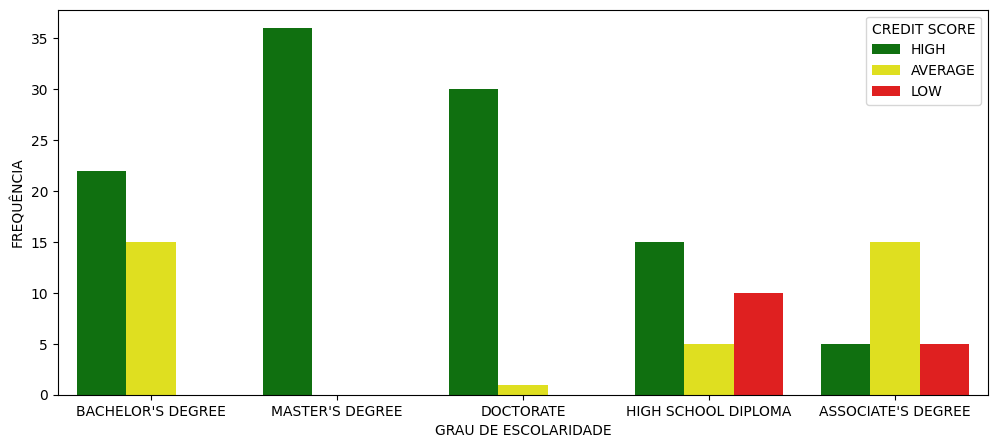

In [25]:
# DISTRIBUIÇÃO DE CREDIT SCORE POR NÍVEL DE ESCOLARIDADE
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x="EDUCATION", hue="CREDIT SCORE", palette=['green', 'yellow', 'red'])

plt.ylabel("FREQUÊNCIA")
plt.xlabel("GRAU DE ESCOLARIDADE")
plt.show()


*Observações:*
1) Consideramos ASSOCIATE'S DEGREE como tecnólogo.
2) Organizamos com a seguinte ordem: HIGH SCHOOL DIPLOMA -> ASSOCIATE'S DEGREE -> BACHELOR'S DEGREE -> MASTER'S DEGREE -> DOCTORATE

A partir do gráfico, podemos perceber que quanto maior o grau de escolaridade, a frequência de _credit score_ na categoria HIGH aumenta.



### O salário parece influenciar no Score de Crédito?

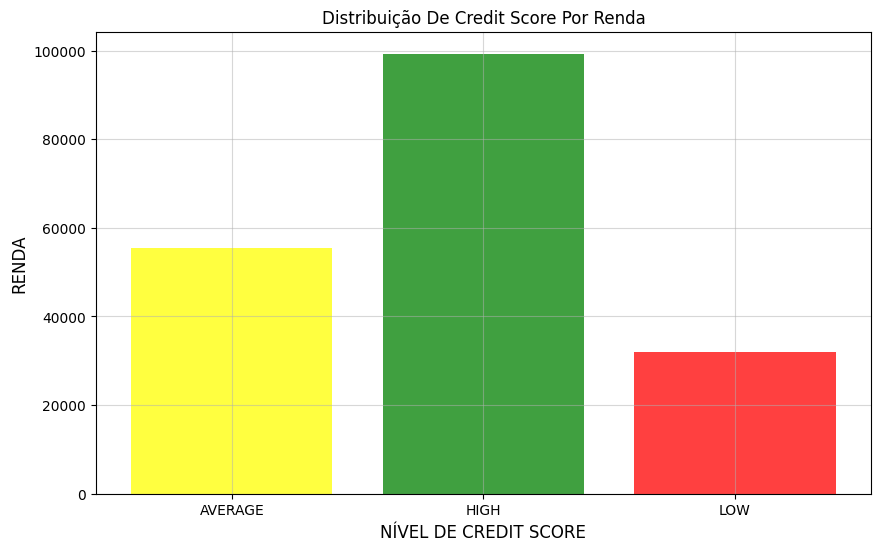

In [26]:
# DISTRIBUIÇÃO DE CREDIT SCORE POR RENDA
plt.figure(figsize=(10, 6))
salario_por_renda = df.groupby('CREDIT SCORE')['INCOME'].mean()

plt.bar(salario_por_renda.index, salario_por_renda, color=['yellow', 'green', 'red'], alpha=0.75)
plt.title('Distribuição de Salários', fontsize=16)
plt.xlabel('NÍVEL DE CREDIT SCORE', fontsize=12)
plt.ylabel('RENDA', fontsize=12)
plt.title("Distribuição De Credit Score Por Renda")
plt.grid(True, alpha=0.5)

plt.show()

Podemos perceber que o salário está intimamente ligado ao nível de crédito. Nota-se a partir do gráfico que quanto maior o nível de crédito, maior a média salarial.

### Clientes com casa própria tendem a ter um score mais alto?

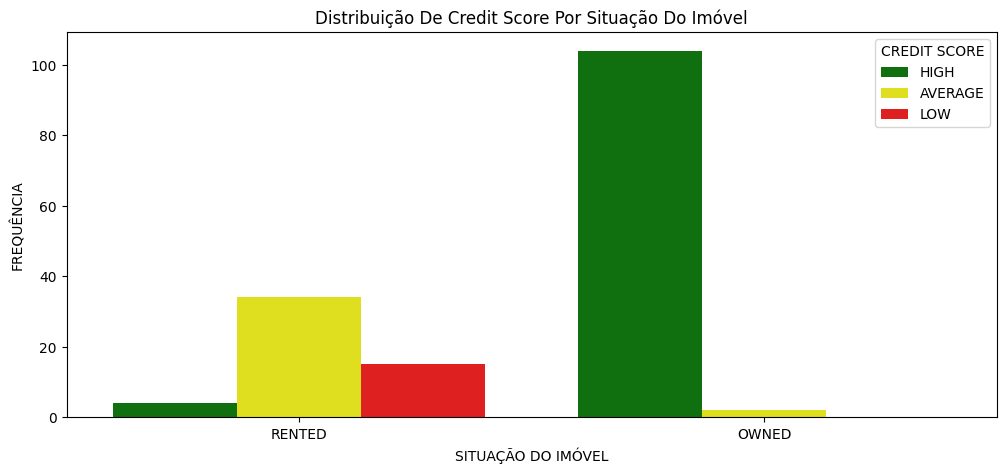

In [27]:
# DISTRIBUIÇÃO DE CREDIT SCORE POR SITUAÇÃO DO IMÓVEL
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x="HOME OWNERSHIP", hue="CREDIT SCORE", palette=['green', 'yellow', 'red'])
plt.title("Distribuição De Credit Score Por Situação Do Imóvel")
plt.ylabel("FREQUÊNCIA")
plt.xlabel("SITUAÇÃO DO IMÓVEL")
plt.show()


Podemos observar a partir do gráfico que: pessoas cujo o imóvel está alugado, tem uma tendência maior a ter crédito na média ou baixo. Enquanto pessoas cujo o imóvel é próprio, tem uma tendência muito forte a ter o crédito alto.

## E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?

 Elabore mais 3 perguntas e responda utilizando gráficos + insights.

### 1) Qual a relação entre gênero e credit score?

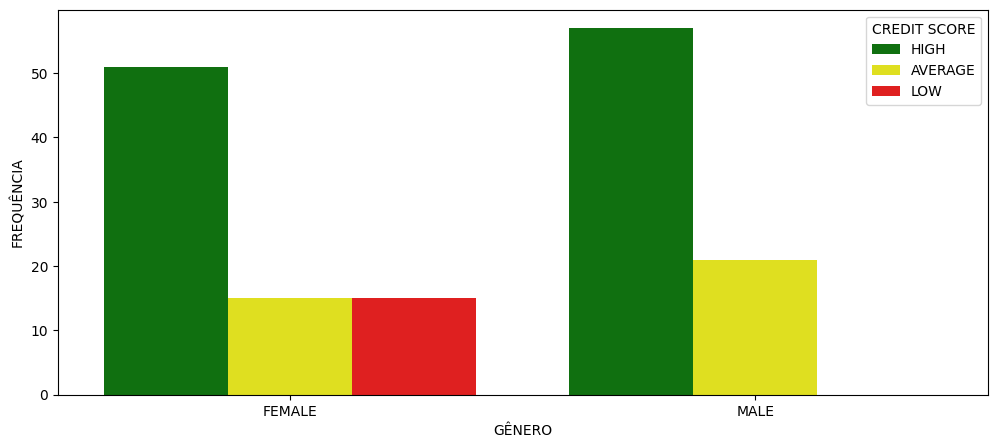

In [28]:
# DISTRIBUIÇÃO DE CREDIT SCORE POR GÊNERO
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x="GENDER", hue="CREDIT SCORE", palette=['green', 'yellow', 'red'])

plt.ylabel("FREQUÊNCIA")
plt.xlabel("GÊNERO")
plt.show()

### 2) Qual a relação entre número de crianças e credit score?

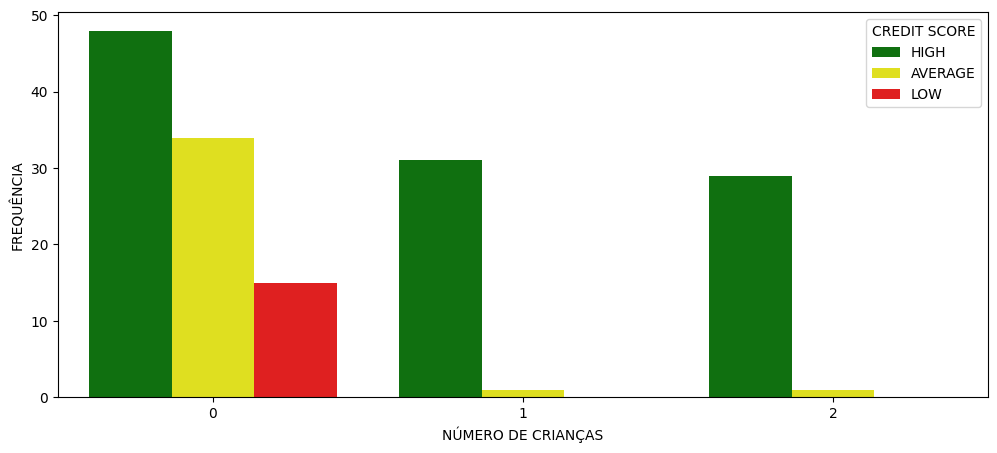

In [29]:
# DISTRIBUIÇÃO DE CREDIT SCORE POR NÚMERO DE CRIANÇAS
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x="NUMBER OF CHILDREN", hue="CREDIT SCORE", palette=['green', 'yellow', 'red'])
plt.ylabel("FREQUÊNCIA")
plt.xlabel("NÚMERO DE CRIANÇAS")
plt.show()

### 3) Qual a relação entre grau de escolaridade e salário?

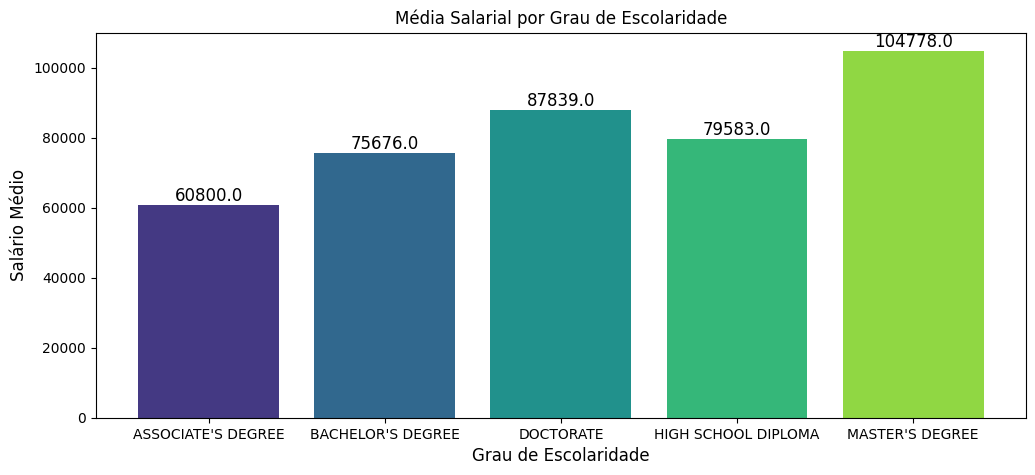

In [30]:
# GRÁFICO: MÉDIA DE SALÁRIO X GRAU DE ESCOLARIDADE
plt.figure(figsize=(12, 5))
media_sal = df.groupby('EDUCATION')['INCOME'].mean().round()
colors = sns.color_palette("viridis", len(media_sal))
plt.bar(range(len(media_sal)), media_sal, color=colors)

for i, valor in enumerate(media_sal):
    plt.text(i, valor, str(valor), ha='center', va='bottom', fontsize=12)

plt.title('Média Salarial por Grau de Escolaridade')
plt.xlabel('Grau de Escolaridade', fontsize=12)
plt.ylabel('Salário Médio', fontsize=12)
plt.xticks(range(len(media_sal)), media_sal.index)

plt.show()


# Etapa 3: Relize os passos que vimos no módulo 17, de Correlação, Balanceamento, atributos categóricos e divisão base treino e teste.

## A) Vamos começar pela análise de correlação, plote da forma que achar melhor a análise de correlação, seja pela tabela ou pelo gráfico da matriz.

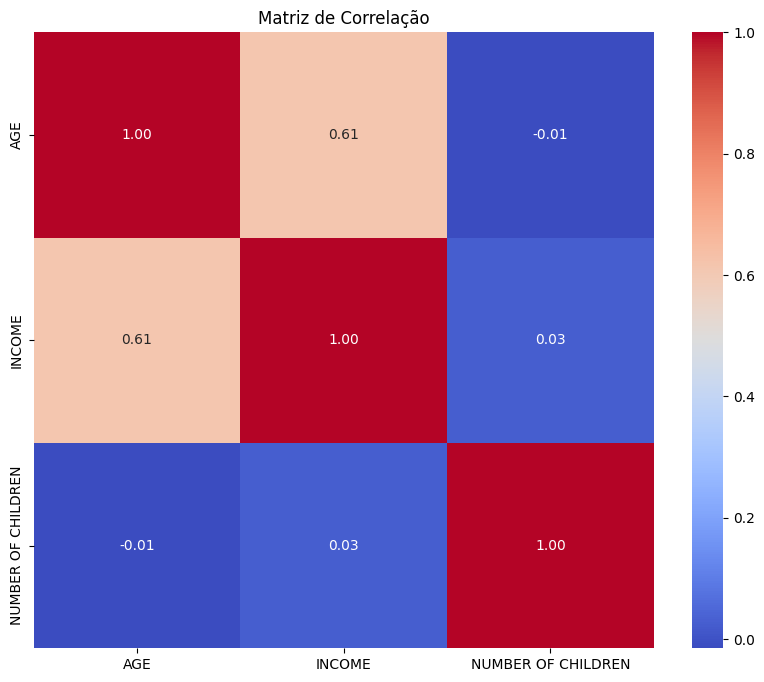

In [31]:
# MATRIZ DE CORRELAÇÃO DO DATAFRAME ORIGINAL
correlation_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlação')
plt.show()

In [32]:
# TABELA DE CORRELAÇÃO DO DATAFRAME ORIGINAL
df_numerico.corr().round(2)

,AGE,INCOME,NUMBER OF CHILDREN
AGE,1.00,0.61,-0.01
INCOME,0.61,1.00,0.03
NUMBER OF CHILDREN,-0.01,0.03,1.00


## B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.

A partir da matriz de correlação, podemos ver que as variáveis de idade e renda estão ligadas. Já vimos no exercício anterior que pessoas com renda acima da média tem uma tendência maior a serem mais velhas.

## C) Temos muitos atributos categóricos nessa base, não? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Após, exclua as colunas categóricas.

In [33]:
df.head()

,AGE,GENDER,INCOME,EDUCATION,MARITAL STATUS,NUMBER OF CHILDREN,HOME OWNERSHIP,CREDIT SCORE
0,25,FEMALE,50000.0,BACHELOR'S DEGREE,SINGLE,0,RENTED,HIGH
1,30,MALE,100000.0,MASTER'S DEGREE,MARRIED,2,OWNED,HIGH
2,35,FEMALE,75000.0,DOCTORATE,MARRIED,1,OWNED,HIGH
3,40,MALE,125000.0,HIGH SCHOOL DIPLOMA,SINGLE,0,OWNED,HIGH
5,50,MALE,150000.0,MASTER'S DEGREE,MARRIED,0,OWNED,HIGH


*Observação:* Ao invés de excluir as colunas, optei por criar um novo dataframe com o Label Encoder aplicado

In [34]:
# APLICAÇÃO DO LABEL ENCODER
df_encoder = df[['AGE', 'GENDER', 'INCOME', 'EDUCATION','MARITAL STATUS', 'NUMBER OF CHILDREN', 'HOME OWNERSHIP', 'CREDIT SCORE']].copy()

df_encoder['GENDER'] = df_encoder['GENDER'].map({'MALE': 0, 'FEMALE': 1})
df_encoder['EDUCATION'] = df_encoder['EDUCATION'].map({"HIGH SCHOOL DIPLOMA": 0, "ASSOCIATE'S DEGREE": 1, "BACHELOR'S DEGREE": 2, "MASTER'S DEGREE": 3, "DOCTORATE": 4})
df_encoder['MARITAL STATUS'] = df_encoder['MARITAL STATUS'].map({'SINGLE': 0, 'MARRIED': 1})
df_encoder.rename(columns={"NUMBER OF CHILDREN": "NUMBER_OF_CHILDREN"}, inplace=True)
df_encoder['HOME OWNERSHIP'] = df_encoder['HOME OWNERSHIP'].map({'RENTED': 0, 'OWNED': 1})
df_encoder['CREDIT SCORE'] = df_encoder['CREDIT SCORE'].map({'LOW': 0, 'AVERAGE': 1, 'HIGH': 2})


In [35]:
# APRESETAÇÃO DO NOVO DATAFRAME
df_encoder.head()

,AGE,GENDER,INCOME,EDUCATION,MARITAL STATUS,NUMBER_OF_CHILDREN,HOME OWNERSHIP,CREDIT SCORE
0,25,1,50000.0,2,0,0,0,2
1,30,0,100000.0,3,1,2,1,2
2,35,1,75000.0,4,1,1,1,2
3,40,0,125000.0,0,0,0,1,2
5,50,0,150000.0,3,1,0,1,2


In [36]:
# APRESENTAÇÃO DO TIPOS DE VARIÁVEL
df_encoder.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AGE                 159 non-null    Int64  
 1   GENDER              159 non-null    int64  
 2   INCOME              159 non-null    Float64
 3   EDUCATION           159 non-null    int64  
 4   MARITAL STATUS      159 non-null    int64  
 5   NUMBER_OF_CHILDREN  159 non-null    int64  
 6   HOME OWNERSHIP      159 non-null    int64  
 7   CREDIT SCORE        159 non-null    int64  
dtypes: Float64(1), Int64(1), int64(6)
memory usage: 11.5 KB


In [37]:
# ATUALIZAÇÃO DO TIPO DE VARIÁVEL
df_encoder['GENDER'] = df_encoder['GENDER'].astype('Int64')
df_encoder['EDUCATION'] = df_encoder['EDUCATION'].astype('Int64')
df_encoder['MARITAL STATUS'] = df_encoder['MARITAL STATUS'].astype('Int64')
df_encoder['HOME OWNERSHIP'] = df_encoder['HOME OWNERSHIP'].astype('Int64')
df_encoder['CREDIT SCORE'] = df_encoder['CREDIT SCORE'].astype('Int64')

df_encoder.rename(columns={"MARITAL STATUS": "MARITAL_STATUS"}, inplace=True)
df_encoder.rename(columns={"HOME OWNERSHIP": "HOME_OWNERSHIP"}, inplace=True)
df_encoder.rename(columns={"CREDIT SCORE": "CREDIT_SCORE"}, inplace=True)

In [38]:
# APRESENTAÇÃO DO TIPOS DE VARIÁVEL (ATUALIZADO)
df_encoder.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AGE                 159 non-null    Int64  
 1   GENDER              159 non-null    Int64  
 2   INCOME              159 non-null    Float64
 3   EDUCATION           159 non-null    Int64  
 4   MARITAL_STATUS      159 non-null    Int64  
 5   NUMBER_OF_CHILDREN  159 non-null    int64  
 6   HOME_OWNERSHIP      159 non-null    Int64  
 7   CREDIT_SCORE        159 non-null    Int64  
dtypes: Float64(1), Int64(6), int64(1)
memory usage: 12.3 KB


In [ ]:
df_encoder.to_csv("CREDIT_SCORE.csv", index=False)

## D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.

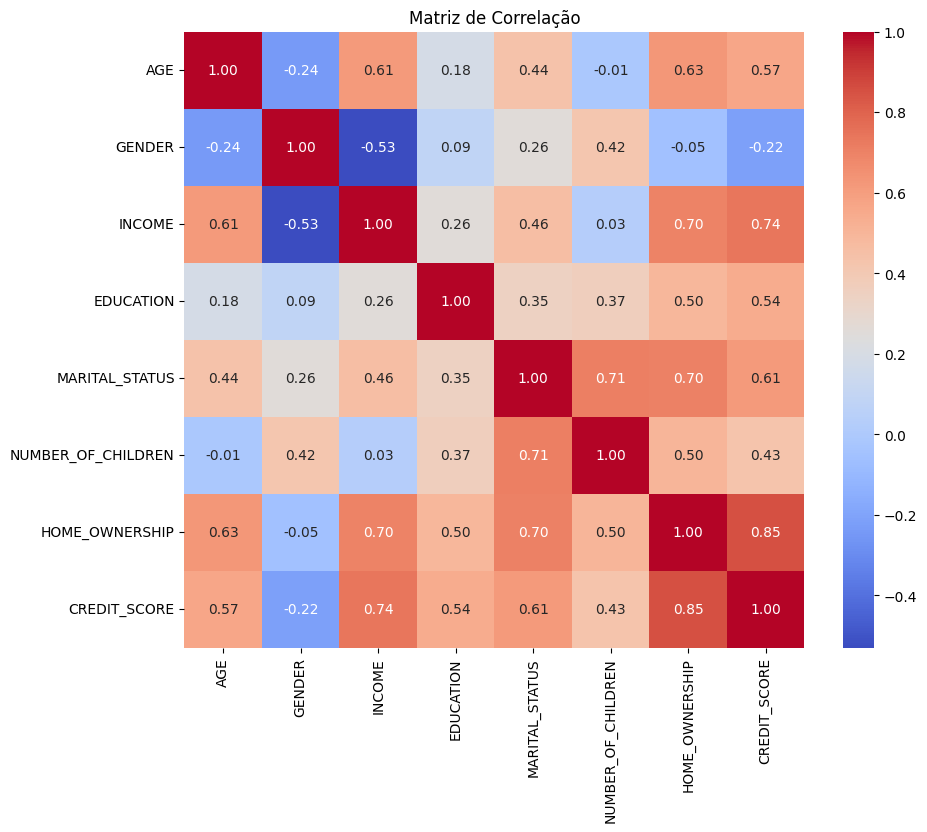

In [40]:
# MATRIZ DE CORRELAÇÃO DO DATAFRAME COM O LABEL ENCODER APLICADO
correlation_matrix = df_encoder.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlação')
plt.show()

In [41]:
# TABELA DE CORRELAÇÃO DO DATAFRAME COM O LABEL ENCODER APLICADO
df_encoder.corr().round(2)

,AGE,GENDER,INCOME,EDUCATION,MARITAL_STATUS,NUMBER_OF_CHILDREN,HOME_OWNERSHIP,CREDIT_SCORE
AGE,1.00,-0.24,0.61,0.18,0.44,-0.01,0.63,0.57
GENDER,-0.24,1.00,-0.53,0.09,0.26,0.42,-0.05,-0.22
INCOME,0.61,-0.53,1.00,0.26,0.46,0.03,0.70,0.74
EDUCATION,0.18,0.09,0.26,1.00,0.35,0.37,0.50,0.54
MARITAL_STATUS,0.44,0.26,0.46,0.35,1.00,0.71,0.70,0.61
NUMBER_OF_CHILDREN,-0.01,0.42,0.03,0.37,0.71,1.00,0.50,0.43
HOME_OWNERSHIP,0.63,-0.05,0.70,0.50,0.70,0.50,1.00,0.85
CREDIT_SCORE,0.57,-0.22,0.74,0.54,0.61,0.43,0.85,1.00


## F) Faça a separação da base em treino e teste e verifique utilizando shape:

In [42]:
# SEPARAÇÃO DO TIPO DE VARIÁVEL
from sklearn.model_selection import train_test_split

X = df_encoder.drop('CREDIT_SCORE', axis=1).astype('float64')
y = df_encoder['CREDIT_SCORE'].astype('int64')
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=42)

In [43]:
# VERIFICAÇÃO DO UTILIZANDO SHAPE

print("Tamanho de X_train:", X_train.shape)
print("Tamanho de X_test:", X_test.shape)
print("Tamanho de y_train:", y_train.shape)
print("Tamanho de y_test:", y_test.shape)

Tamanho de X_train: (119, 7)
Tamanho de X_test: (40, 7)
Tamanho de y_train: (119,)
Tamanho de y_test: (40,)


## G) É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento.

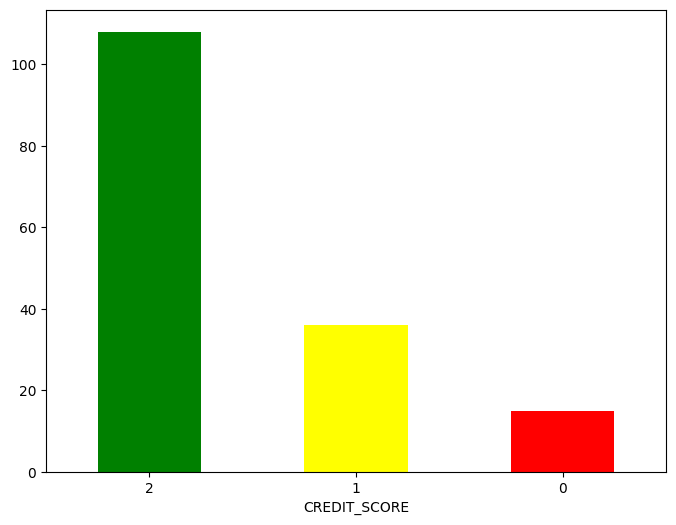

In [44]:
# VERIFICAÇÃO DO BALANCEAMENTO

churn_counts = df_encoder['CREDIT_SCORE'].value_counts()
plt.figure(figsize=(8, 6))
churn_counts.plot(kind='bar', color=['green', 'yellow', 'red'], rot=0)
plt.show()

Observamos que há um desbalanceamento claro: há mais pessoas com o crédito alto do que os demais. 

## H) Vamos realizar o balancecamento dos dados da coluna de credit score.
Se lembre que realizazmos apenas para a base de treino.

In [45]:
# BALANCEAMENTO
smote = SMOTE(random_state=12)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
print("Distribuição das classes após o balanceamento:")
print(y_train_balanced.value_counts())

Distribuição das classes após o balanceamento:
CREDIT_SCORE
2    81
1    81
0    81
Name: count, dtype: int64
